In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

1. 통계값 보기
2. 컬럼별 null 확인
3. msno로 null 확인

In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
for col in df_train.columns : 
    Percent_of_NaN = 100 * (df_train[col].isnull().sum()/len(df_train[col]))
    print('column : {:>12} \t Percent of NaN Value : {:.2f}%'.format(col,Percent_of_NaN))

column :  PassengerId 	 Percent of NaN Value : 0.00%
column :     Survived 	 Percent of NaN Value : 0.00%
column :       Pclass 	 Percent of NaN Value : 0.00%
column :         Name 	 Percent of NaN Value : 0.00%
column :          Sex 	 Percent of NaN Value : 0.00%
column :          Age 	 Percent of NaN Value : 19.87%
column :        SibSp 	 Percent of NaN Value : 0.00%
column :        Parch 	 Percent of NaN Value : 0.00%
column :       Ticket 	 Percent of NaN Value : 0.00%
column :         Fare 	 Percent of NaN Value : 0.00%
column :        Cabin 	 Percent of NaN Value : 77.10%
column :     Embarked 	 Percent of NaN Value : 0.22%


In [35]:
for col in df_test.columns : 
    Percent_of_NaN = 100 * (df_test[col].isnull().sum()/len(df_test[col]))
    print('column : {:>12} \t Percent of NaN Value : {:.2f}%'.format(col,Percent_of_NaN))

column :  PassengerId 	 Percent of NaN Value : 0.00%
column :       Pclass 	 Percent of NaN Value : 0.00%
column :         Name 	 Percent of NaN Value : 0.00%
column :          Sex 	 Percent of NaN Value : 0.00%
column :          Age 	 Percent of NaN Value : 20.57%
column :        SibSp 	 Percent of NaN Value : 0.00%
column :        Parch 	 Percent of NaN Value : 0.00%
column :       Ticket 	 Percent of NaN Value : 0.00%
column :         Fare 	 Percent of NaN Value : 0.24%
column :        Cabin 	 Percent of NaN Value : 78.23%
column :     Embarked 	 Percent of NaN Value : 0.00%


<AxesSubplot:>

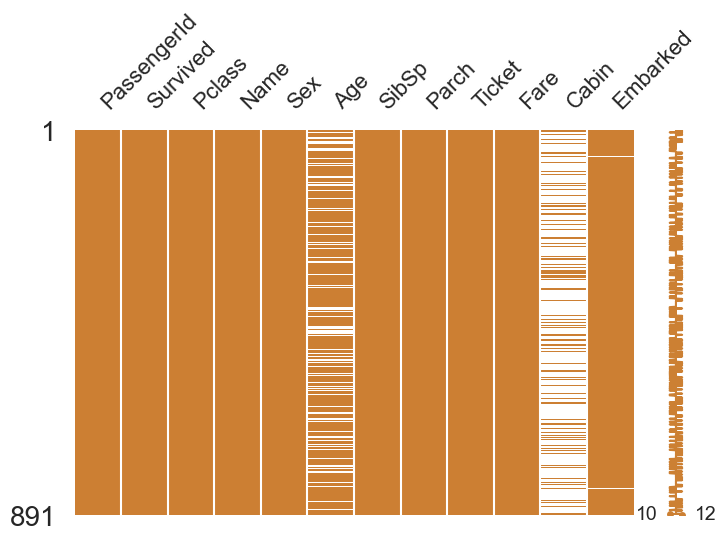

In [42]:
msno.matrix(df=df_train, figsize=(8,5), color=(0.8,0.5,0.2))

<AxesSubplot:>

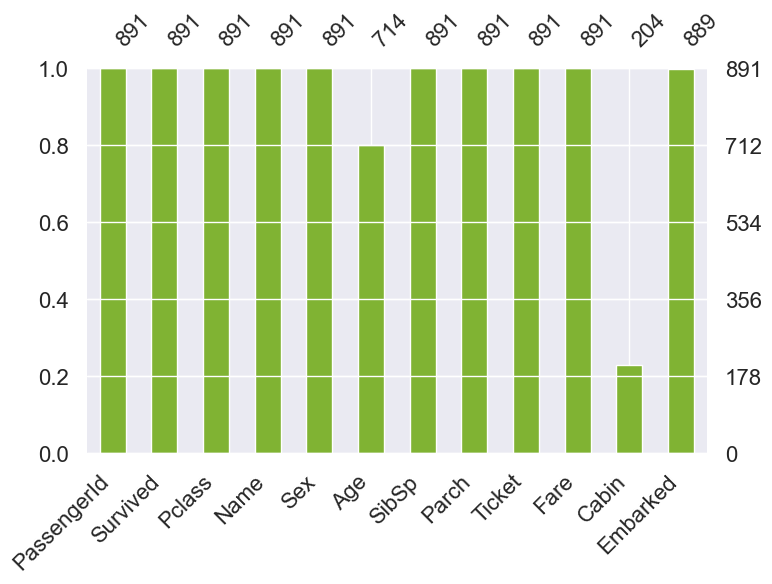

In [41]:
msno.bar(df=df_train, figsize=(8,5), color=(0.5,0.7,0.2))

# Target Label이 편향되지 않았는지 분포를 확인하기

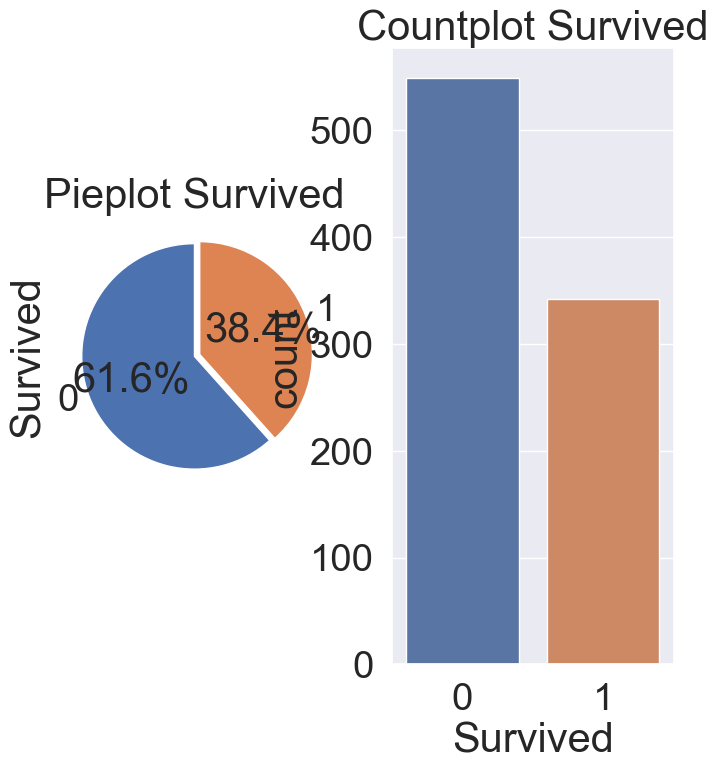

In [77]:
f,ax = plt.subplots(1,2,figsize=(8,8))

df_train['Survived'].value_counts().plot.pie(explode=(0,0.05),autopct='%1.1f%%',ax=ax[0],shadow=False,startangle=90)
ax[0].set_title('Pieplot Survived')
# ax[0].set_label(['Dead','Survived'])
ax[0].set_label('')

sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Countplot Survived')

plt.show()

# EDA - Pclass

In [95]:
# print(df_train.groupby('Pclass',as_index=True).count()['Survived'])
# print(df_train.groupby('Pclass',as_index=True).sum()['Survived'])
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r')
# df_train.groupby('Pclass',as_index=).count()['Survived'].plot.bar()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

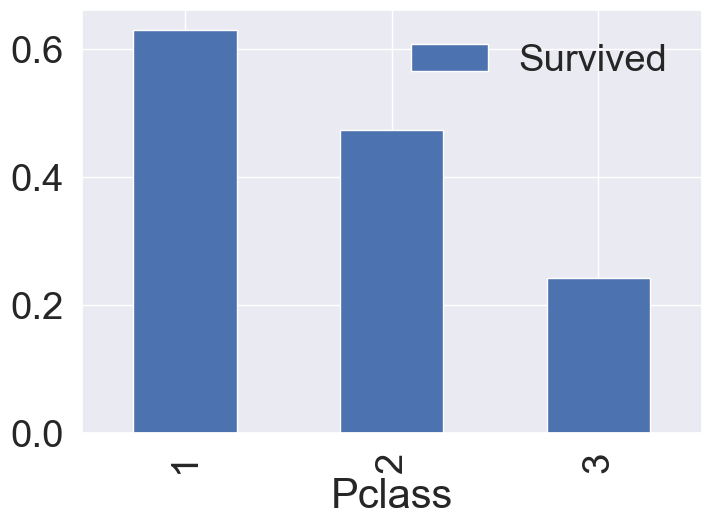

In [101]:
df_train[['Pclass','Survived']].groupby('Pclass').mean().sort_values(by='Survived',ascending=False) .plot.bar()

# EDA - Sex

# EDA - Age

# EDA - Embarked

# EDA - Family(SibSp + Parch)

# EDA - Fare, Cabin, Ticket